In [12]:
import os
from collections import defaultdict
import time

import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from PIL import Image

from vae_v3.model import VAE
from vae_v3.dataset import TrashDataset

In [7]:
INPUT_DIM=64*64
Z_DIM = 10
NUM_EPOCHS=120
BATCH_SIZE=1024
LA_REATE = 0.00015
SAVE_MODEL_ITTR=10
SAVE_MODEL_PATH= "./vae_v3_saved_models"
DEVICE="cuda"

In [3]:
train_dataset = TrashDataset("../student_db",train=True, transform=None, grayscale = False, subset=True)
train_loader = DataLoader(train_dataset,batch_size=BATCH_SIZE, shuffle=True) 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 1816 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 3216 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 5016 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 6816 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done 9016 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done 11216 tasks      | elapsed:    5.6s
[Parallel(n_jobs=8)]: Done 13044 tasks      | elapsed:    6.7s
[Parallel(n_jobs=8)]: Done 13328 tasks      | elapsed:    6.8s
[Parallel(n_jobs=8)]: Done 14012 tasks      | elapsed:    6.9s
[Parallel(n_jobs=8)]: Done 14117 tasks      | elapsed:    7.0s
[Parallel(n_jobs=8)]: Done 14236 tasks      | elapsed:    7.1s
[Parallel(n_jobs=8)]: Done 14741 tasks      | elapsed:    7.1s
[Parallel(n_jobs=8)]: Done 15000 out of 15000 |

In [4]:
model = VAE(z_dim=Z_DIM).to(DEVICE)

In [5]:
def loss_function(x_hat, x, mean, log_var):
    reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + KLD

optimizer = optim.Adam(model.parameters(), lr=LA_REATE)
loss_fn = loss_function


In [6]:
model.train()
epoch_train_losses = []
for epoch in range(NUM_EPOCHS):

    losses = []
    all_y, all_z, all_mu, all_logvar = [], [], [], []

    batch = tqdm(enumerate(train_loader))
    for idx, data in batch:
        # Forward pass
        x = data["img"].to(DEVICE)
        recunstructed_img, code_output, mean, logvar = model(x)

        # Compute loss
        recunstructed_loss = loss_fn(recunstructed_img, x, mean, logvar)

        # Backprop
        optimizer.zero_grad()
        recunstructed_loss.backward()
        optimizer.step()

        losses.append(recunstructed_loss.item())

        all_z.extend(code_output.data.cpu().numpy())
        all_mu.extend(mean.data.cpu().numpy())
        all_logvar.extend(logvar.data.cpu().numpy())



        batch.set_postfix(loss=recunstructed_loss.item())

    epoch_train_losses.append(losses)
    if (epoch+1) % SAVE_MODEL_ITTR == 0:
        torch.save(model.state_dict(), os.path.join(SAVE_MODEL_PATH, 'model_epoch{}.pth'.format(epoch + 1)))  # save motion_encoder
        print("Epoch {} model saved!".format(epoch + 1))
    

0it [00:00, ?it/s]

15it [00:05,  2.94it/s, loss=5.34e+6]
15it [00:04,  3.06it/s, loss=5.28e+6]
15it [00:04,  3.06it/s, loss=5.26e+6]
15it [00:04,  3.05it/s, loss=5.23e+6]
15it [00:04,  3.05it/s, loss=5.23e+6]
15it [00:04,  3.06it/s, loss=5.18e+6]
15it [00:04,  3.06it/s, loss=5.16e+6]
15it [00:04,  3.06it/s, loss=5.15e+6]
15it [00:04,  3.06it/s, loss=5.17e+6]
15it [00:04,  3.06it/s, loss=5.13e+6]


Epoch 10 model saved!


15it [00:04,  3.06it/s, loss=5.09e+6]
15it [00:04,  3.06it/s, loss=5.13e+6]
15it [00:04,  3.06it/s, loss=5.15e+6]
15it [00:04,  3.06it/s, loss=5.09e+6]
15it [00:04,  3.05it/s, loss=5.11e+6]
15it [00:04,  3.06it/s, loss=5.11e+6]
15it [00:04,  3.06it/s, loss=5.08e+6]
15it [00:04,  3.06it/s, loss=5.05e+6]
15it [00:04,  3.06it/s, loss=5.04e+6]
15it [00:04,  3.06it/s, loss=5.08e+6]


Epoch 20 model saved!


15it [00:04,  3.06it/s, loss=5.04e+6]
15it [00:04,  3.06it/s, loss=5.07e+6]
15it [00:04,  3.06it/s, loss=5.03e+6]
15it [00:04,  3.06it/s, loss=5.07e+6]
15it [00:04,  3.06it/s, loss=4.99e+6]
15it [00:04,  3.06it/s, loss=5.05e+6]
15it [00:04,  3.06it/s, loss=5.03e+6]
15it [00:04,  3.06it/s, loss=5.04e+6]
15it [00:04,  3.05it/s, loss=5.05e+6]
15it [00:04,  3.06it/s, loss=5.03e+6]


Epoch 30 model saved!


15it [00:04,  3.06it/s, loss=5.03e+6]
15it [00:04,  3.06it/s, loss=4.98e+6]
15it [00:04,  3.06it/s, loss=5.01e+6]
15it [00:04,  3.06it/s, loss=5.03e+6]
15it [00:04,  3.05it/s, loss=5e+6]   
15it [00:04,  3.03it/s, loss=5.02e+6]
15it [00:04,  3.04it/s, loss=5.02e+6]
15it [00:04,  3.04it/s, loss=5e+6]   
15it [00:04,  3.06it/s, loss=4.99e+6]
15it [00:04,  3.06it/s, loss=4.99e+6]


Epoch 40 model saved!


15it [00:04,  3.06it/s, loss=4.98e+6]
15it [00:04,  3.06it/s, loss=4.98e+6]
15it [00:04,  3.06it/s, loss=5.03e+6]
15it [00:04,  3.06it/s, loss=5.04e+6]
15it [00:04,  3.06it/s, loss=5.01e+6]
15it [00:04,  3.06it/s, loss=5.02e+6]
15it [00:04,  3.06it/s, loss=4.99e+6]
15it [00:04,  3.01it/s, loss=4.97e+6]
15it [00:04,  3.05it/s, loss=4.96e+6]
15it [00:04,  3.04it/s, loss=4.96e+6]


Epoch 50 model saved!


15it [00:04,  3.06it/s, loss=5.01e+6]
15it [00:04,  3.06it/s, loss=4.96e+6]
15it [00:04,  3.06it/s, loss=4.95e+6]
15it [00:04,  3.06it/s, loss=4.97e+6]
15it [00:04,  3.05it/s, loss=4.99e+6]
15it [00:04,  3.05it/s, loss=4.98e+6]
15it [00:04,  3.05it/s, loss=4.95e+6]
15it [00:04,  3.05it/s, loss=5.02e+6]
15it [00:04,  3.05it/s, loss=4.95e+6]
15it [00:04,  3.05it/s, loss=4.98e+6]


Epoch 60 model saved!


15it [00:04,  3.06it/s, loss=4.96e+6]
15it [00:04,  3.06it/s, loss=5e+6]   
15it [00:04,  3.06it/s, loss=4.95e+6]
15it [00:04,  3.06it/s, loss=4.98e+6]
15it [00:04,  3.06it/s, loss=4.97e+6]
15it [00:04,  3.06it/s, loss=4.99e+6]
15it [00:04,  3.06it/s, loss=4.99e+6]
15it [00:04,  3.03it/s, loss=4.97e+6]
15it [00:04,  3.04it/s, loss=4.97e+6]
15it [00:04,  3.05it/s, loss=4.94e+6]


Epoch 70 model saved!


15it [00:04,  3.05it/s, loss=4.99e+6]
15it [00:04,  3.04it/s, loss=4.99e+6]
15it [00:04,  3.04it/s, loss=4.96e+6]
15it [00:04,  3.05it/s, loss=4.96e+6]
15it [00:04,  3.05it/s, loss=4.98e+6]
15it [00:04,  3.05it/s, loss=4.96e+6]
15it [00:04,  3.05it/s, loss=4.96e+6]
15it [00:04,  3.04it/s, loss=4.96e+6]
15it [00:04,  3.04it/s, loss=4.95e+6]
15it [00:04,  3.05it/s, loss=4.95e+6]


Epoch 80 model saved!


15it [00:04,  3.05it/s, loss=4.95e+6]
15it [00:04,  3.05it/s, loss=4.94e+6]
15it [00:04,  3.05it/s, loss=4.94e+6]
15it [00:04,  3.05it/s, loss=4.92e+6]
15it [00:04,  3.05it/s, loss=5e+6]   
15it [00:04,  3.05it/s, loss=4.94e+6]
15it [00:04,  3.05it/s, loss=4.95e+6]
15it [00:04,  3.04it/s, loss=4.96e+6]
15it [00:04,  3.05it/s, loss=4.95e+6]
15it [00:04,  3.05it/s, loss=4.91e+6]


Epoch 90 model saved!


15it [00:04,  3.05it/s, loss=4.96e+6]
15it [00:04,  3.05it/s, loss=4.95e+6]
15it [00:04,  3.05it/s, loss=4.95e+6]
15it [00:04,  3.03it/s, loss=4.96e+6]
15it [00:04,  3.04it/s, loss=4.95e+6]
15it [00:04,  3.05it/s, loss=4.92e+6]
15it [00:04,  3.05it/s, loss=4.92e+6]
15it [00:04,  3.05it/s, loss=4.96e+6]
15it [00:04,  3.05it/s, loss=4.91e+6]
15it [00:04,  3.04it/s, loss=4.92e+6]


Epoch 100 model saved!


15it [00:04,  3.05it/s, loss=4.97e+6]
15it [00:04,  3.05it/s, loss=4.95e+6]
15it [00:04,  3.05it/s, loss=4.94e+6]
15it [00:04,  3.00it/s, loss=4.91e+6]
15it [00:04,  3.04it/s, loss=4.95e+6]
15it [00:04,  3.03it/s, loss=4.95e+6]
15it [00:04,  3.03it/s, loss=4.95e+6]
15it [00:04,  3.04it/s, loss=4.95e+6]
15it [00:04,  3.05it/s, loss=4.92e+6]
15it [00:04,  3.04it/s, loss=4.92e+6]


Epoch 110 model saved!


15it [00:04,  3.05it/s, loss=4.97e+6]
15it [00:04,  3.05it/s, loss=4.93e+6]
15it [00:04,  3.05it/s, loss=4.94e+6]
15it [00:04,  3.05it/s, loss=4.9e+6] 
15it [00:04,  3.05it/s, loss=4.99e+6]
15it [00:04,  3.05it/s, loss=4.94e+6]
15it [00:04,  3.05it/s, loss=4.93e+6]
15it [00:04,  3.05it/s, loss=4.94e+6]
15it [00:04,  3.05it/s, loss=4.94e+6]
15it [00:04,  3.05it/s, loss=4.91e+6]

Epoch 120 model saved!


In [9]:
model.eval()
train_img1 = train_dataset[0]["img"]
train_img1 = train_img1.unsqueeze(0)
recunstructed_img, code_output, mean, logvar = model(train_img1.to(DEVICE))
recunstructed_img

tensor([[[[0.0875, 0.1296, 0.2270,  ..., 0.1016, 0.1170, 0.1407],
          [0.0560, 0.0855, 0.2313,  ..., 0.1058, 0.1107, 0.1146],
          [0.0521, 0.0666, 0.2183,  ..., 0.1043, 0.1235, 0.1269],
          ...,
          [0.1637, 0.1532, 0.1938,  ..., 0.3067, 0.2782, 0.2850],
          [0.1843, 0.1723, 0.2042,  ..., 0.3143, 0.2792, 0.2912],
          [0.1983, 0.2060, 0.2293,  ..., 0.3397, 0.2926, 0.3435]],

         [[0.1314, 0.1318, 0.2632,  ..., 0.1211, 0.1451, 0.1266],
          [0.0658, 0.1083, 0.2975,  ..., 0.1052, 0.1204, 0.1281],
          [0.0647, 0.1016, 0.2785,  ..., 0.1220, 0.1448, 0.1436],
          ...,
          [0.2065, 0.1843, 0.2379,  ..., 0.3394, 0.3198, 0.3161],
          [0.2114, 0.1921, 0.2442,  ..., 0.3388, 0.3222, 0.3239],
          [0.2436, 0.2264, 0.2600,  ..., 0.3680, 0.3471, 0.3634]],

         [[0.1287, 0.1485, 0.3307,  ..., 0.1355, 0.1674, 0.1569],
          [0.0879, 0.1435, 0.3504,  ..., 0.1453, 0.1592, 0.1577],
          [0.0816, 0.1304, 0.3448,  ..., 0

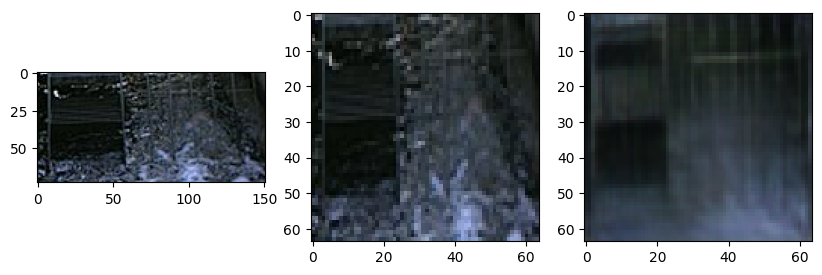

In [24]:
fig, axes = plt.subplots(1,3, figsize=(10,6))
x = np.transpose(train_img1[0], (1, 2, 0))
x_hat = np.transpose(recunstructed_img[0].cpu().detach().numpy(), (1, 2, 0))
img = Image.open(train_dataset[0]["path"]).convert('RGB')
axes[0].imshow(img)
axes[1].imshow(x)
axes[2].imshow(x_hat)
plt.show()

In [8]:
BATCH_SIZE=32
test_dataset = TrashDataset("../student_db",train=False, transform=None, grayscale = False, subset=False)
test_loader = DataLoader(test_dataset,batch_size=BATCH_SIZE, shuffle=True) 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 1816 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 2472 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 2784 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 2910 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 3064 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 3218 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 3772 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 4140 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 4400 out of 4400 | elapsed:    2.0s finished


In [19]:
ignorance_threshold = 0.2

all_actual_predictions = {}
all_diffs = {}


epochs = [10,20,30,40,50,60,70,80,90,100,110,120]

                 # model eval version
for epoch in epochs:
    

    model = VAE(z_dim=Z_DIM)
    model.load_state_dict(torch.load(SAVE_MODEL_PATH+f"/model_epoch{epoch}.pth"))
    model = model.to(DEVICE)
    model.eval()  

    predictions = []
    actual = []
    all_diffs_per_epoch = defaultdict(list)
 
    for data in test_loader:
        # data = loaded_dataset[random.randint(0,len(loaded_dataset))]
        epoch_start_time = time.time()
        x = data['img'].to(DEVICE)
        x_hat, code_output, mean, logvar = model(x)
        epoch_time = time.time() - epoch_start_time

        for i in range(data["img"].shape[0]):
            diff_img = np.abs(data["img"][i].numpy() - x_hat[i].cpu().detach().numpy())
            diff_img[diff_img < ignorance_threshold] = 0
            diff = np.sum(diff_img)

            if diff < 2500:
                predictions.append("notrash")
            else:
                predictions.append("trash")
            # print(data["path"])
            if "notrash"in data["path"][i]:
                actual.append("notrash")
            else:
                actual.append("trash")

            all_diffs_per_epoch["notrash" if "notrash"in data["path"][i] else "trash"].append(diff)

    all_actual_predictions[epoch] = (actual, predictions)
    all_diffs[epoch] = all_diffs_per_epoch

In [17]:
def balanced_accuracy(tp,tn,fp,fn):
    return (0.5*(tp/(tp+fn))) + (0.5*(tn/(tn+fp)))

def calculate_metrics(all_actual_predictions:dict):
    all_balanced_accuracy = {}
    for epoch, (act, pred) in all_actual_predictions.items():
        true_pos, true_neg, false_pos, false_neg = 0, 0, 1, 1
        for i in range(len(act)):
            if pred[i] == act[i] == "trash": 
                true_pos+=1
            elif pred[i] == act[i] == "notrash":
                true_neg +=1
            elif pred[i] == "trash" and act[i] =="notrash":
                false_pos +=1
            elif pred[i] == "notrash" and act[i] == "trash":
                false_neg +=1
        
        all_balanced_accuracy[epoch] = (balanced_accuracy(true_pos, true_neg, false_pos, false_neg), true_pos, true_neg, false_pos, false_neg)
    return all_balanced_accuracy

In [20]:
balanced_acc_1 = calculate_metrics(all_actual_predictions)
balanced_acc_1

{10: (0.5001524285855015, 1, 2870, 1, 1530),
 20: (0.4998258446534309, 0, 2870, 1, 1531),
 30: (0.4998258446534309, 0, 2870, 1, 1531),
 40: (0.4998258446534309, 0, 2870, 1, 1531),
 50: (0.4998258446534309, 0, 2870, 1, 1531),
 60: (0.5001524285855015, 1, 2870, 1, 1530),
 70: (0.5001524285855015, 1, 2870, 1, 1530),
 80: (0.4998258446534309, 0, 2870, 1, 1531),
 90: (0.5001524285855015, 1, 2870, 1, 1530),
 100: (0.5001524285855015, 1, 2870, 1, 1530),
 110: (0.4998258446534309, 0, 2870, 1, 1531),
 120: (0.5001524285855015, 1, 2870, 1, 1530)}